# AutoKeras (AutoML) demos

Note: this notebook uses Colab GPU runtime

## Install AutoKeras

In [1]:
!pip3 install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 30.2 MB/s 
     |████████████████████████████████| 135 kB 70.7 MB/s 
     |████████████████████████████████| 1.6 MB 50.3 MB/s 


## AutoKeras Image Classifier

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
import autokeras as ak

clf = ak.ImageClassifier(max_trials=1, overwrite=True)
clf.fit(x_train, y_train)

Trial 1 Complete [00h 04m 15s]
val_loss: 0.034152060747146606

Best val_loss So Far: 0.034152060747146606
Total elapsed time: 00h 04m 15s
Epoch 1/14
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1585 - accuracy: 0.9524
Epoch 2/14
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0751 - accuracy: 0.9774
Epoch 3/14
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0621 - accuracy: 0.9807
Epoch 4/14
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0514 - accuracy: 0.9837
Epoch 5/14
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0466 - accuracy: 0.9851
Epoch 6/14
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0417 - accuracy: 0.9869
Epoch 7/14
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0379 - accuracy: 0.9879
Epoch 8/14
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0351 - accuracy: 0.9887
Epoch 9/14
1875/1875 [========================

In [4]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 28, 28)           0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 28, 28, 1)        0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                             

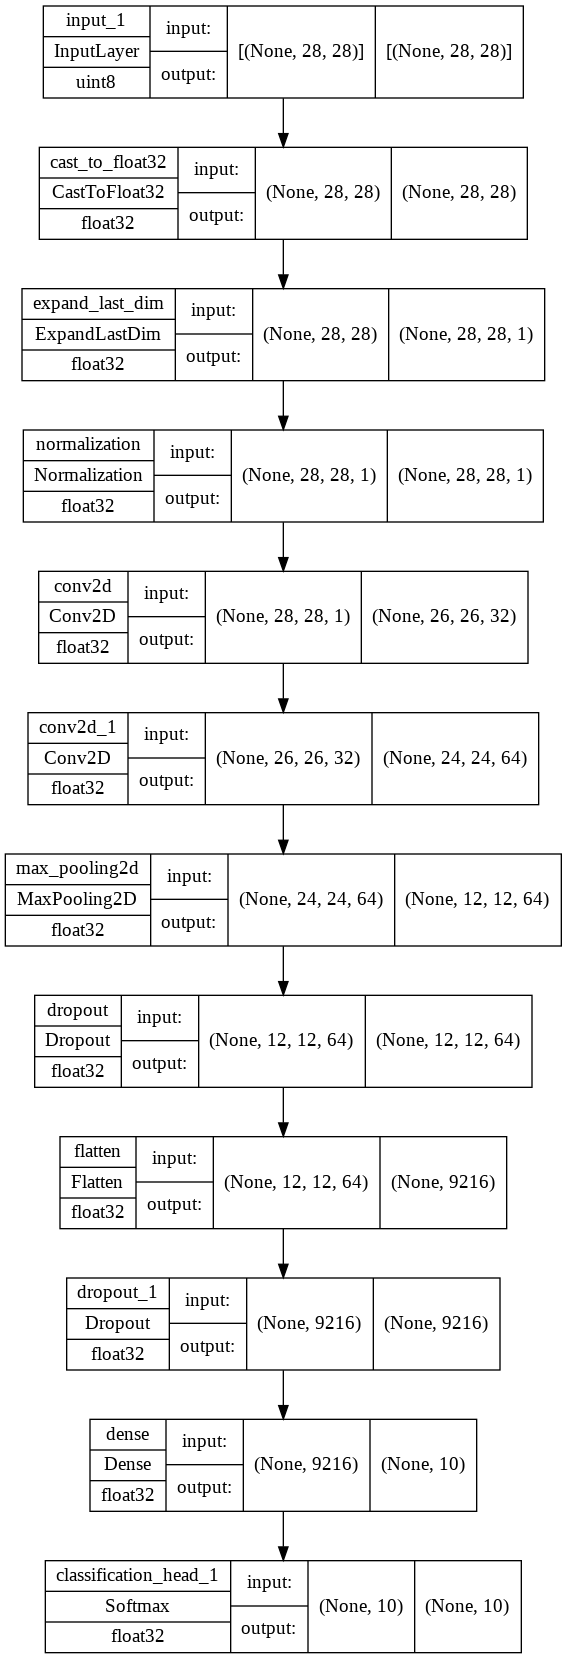

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True)

In [6]:
loss, accuracy = clf.evaluate(x_test, y_test)

print(f'Prediction loss: {loss:.4f}')
print(f'Prediction accuracy: {accuracy:.4f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0368 - accuracy: 0.9896
Prediction loss: 0.0368
Prediction accuracy: 0.9896


In [7]:
predicted = clf.predict(x_test).flatten().astype('uint8')

313/313 [==============================] - 1s 2ms/step


In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      1.00      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



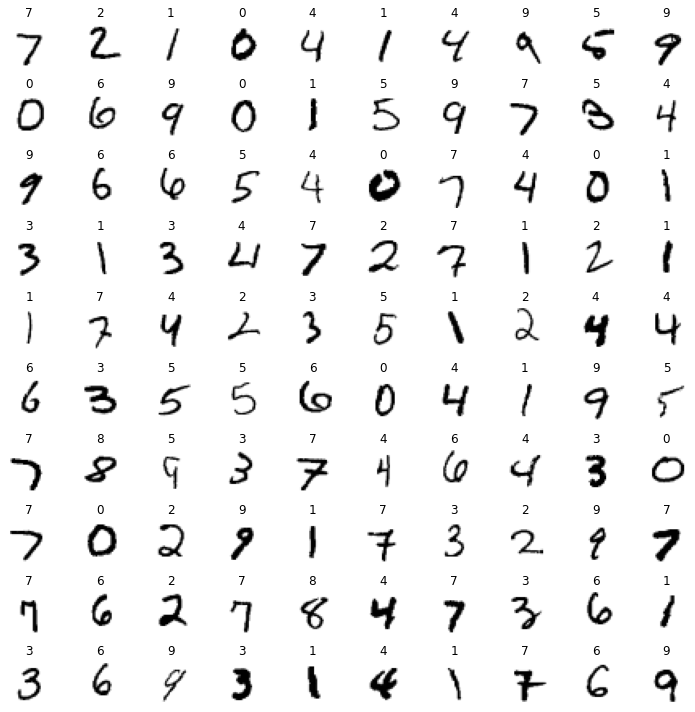

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.set_axis_off()
    plt.imshow(x_test[i], cmap='binary')
    ax.set_title(f'{predicted[i]}')
plt.tight_layout()
plt.show()

## AutoKeras Text Classifier

In [10]:
import pandas as pd

df = pd.read_csv('https://github.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/raw/master/spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [11]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.v1 = df.v1.map({'ham': 0, 'spam': 1})
labels = ('ham', 'spam')

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
  df.v2.to_numpy(), df.v1.to_numpy(), test_size=0.2, random_state=42)

In [12]:
import autokeras as ak

clf = ak.TextClassifier(max_trials=2, overwrite=True)
clf.fit(x_train, y_train)

Trial 2 Complete [00h 00m 34s]
val_loss: 0.07800382375717163

Best val_loss So Far: 0.0697399377822876
Total elapsed time: 00h 00m 51s
Epoch 1/2
140/140 [==============================] - 2s 9ms/step - loss: 0.3157 - accuracy: 0.8903
Epoch 2/2
140/140 [==============================] - 1s 8ms/step - loss: 0.0558 - accuracy: 0.9823


In [13]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLast  (None, 1)                0         
 Dim)                                                            
                                                                 
 text_vectorization (TextVec  (None, 512)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

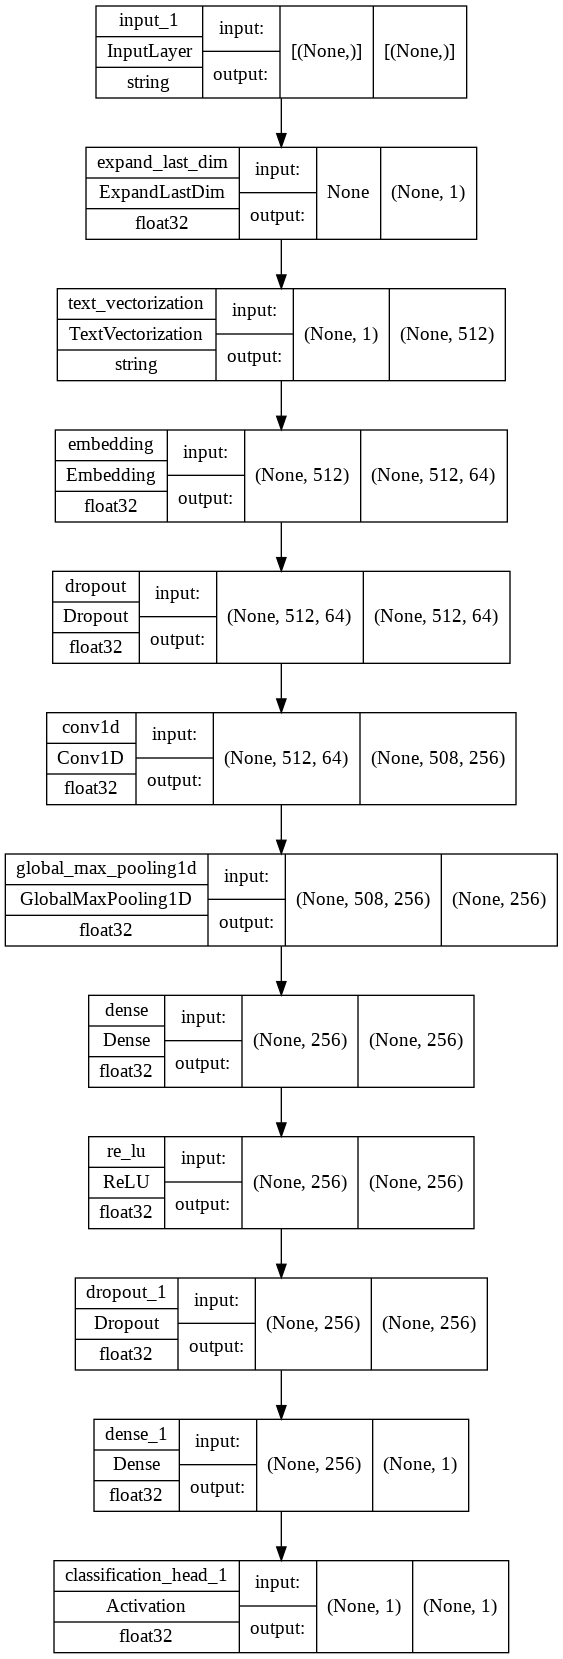

In [14]:
plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True)

In [15]:
loss, accuracy = clf.evaluate(x_test, y_test)

print(f'Prediction loss: {loss:.4f}')
print(f'Prediction accuracy: {accuracy:.4f}')

35/35 [==============================] - 0s 7ms/step - loss: 0.0577 - accuracy: 0.9794
Prediction loss: 0.0577
Prediction accuracy: 0.9794


In [16]:
predicted = clf.predict(x_test).flatten().astype('uint8')

35/35 [==============================] - 0s 4ms/step


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted, target_names=labels))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.92      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [18]:
for i in range(10):
  print('Test:', x_test[i])
  print('Predict:', labels[predicted[i]])
  print('Real:', labels[y_test[i]])
  print('')

Test: Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens
Predict: spam
Real: ham

Test: I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones
Predict: ham
Real: ham

Test: We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p
Predict: spam
Real: spam

Test: Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.
Predict: ham
Real: ham

Test: Congratulations ur awarded either å£500 of CD gift vouchers & Free entry 2 our å£100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16
Predict: spam
Real: spam

Test: I'll text carlos and let you know, hang on
Predict: ham
Real: ham

Test: K.i did't see 